In [ ]:

#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loads CSV file into DataFrame
#sep="," tells pandas values are comma-separated

df = pd.read_table("/content/Scores.csv",sep=",")
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/Scores.csv'

In [ ]:
df.info()
#we have two types datatypes in given dataset (int64,float64)
#In the dataset there 25 rows & 2 columns
#hours column have float values and scores are in int64
#we dont ahve any null value in this dataset.

NameError: name 'df' is not defined

In [ ]:
#Calculates average study hours
a=df['Hours'].mean()

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
a.mean()

np.float64(5.012)

In [ ]:
#Defines a function to assign grades
def getgrade(mark):
  if(mark>=75):
    return "A"
  elif(mark>=60) and (mark<75):
    return "B"
  elif(mark>=35) and (mark<60):
    return "c"
  else:
    return "F"


In [ ]:
#we use .apply() to apply functionality on given index ,column
#Applies grading function to every score

df['Scores'].apply(getgrade)

,Scores
0,F
1,c
2,F
3,A
4,F
5,F
6,A
7,B
8,A
9,F


In [ ]:
#Stores grades permanently in new column
df['grade']=df['Scores'].apply(getgrade)

In [ ]:
df

,Hours,Scores,grade
0,2.5,21,F
1,5.1,47,c
2,3.2,27,F
3,8.5,75,A
4,3.5,30,F
5,1.5,20,F
6,9.2,88,A
7,5.5,60,B
8,8.3,81,A
9,2.7,25,F


In [ ]:
#Counts number of students in each grade
df['grade'].value_counts()

,count
grade,
F,9
A,7
c,5
B,4


<Axes: xlabel='grade'>

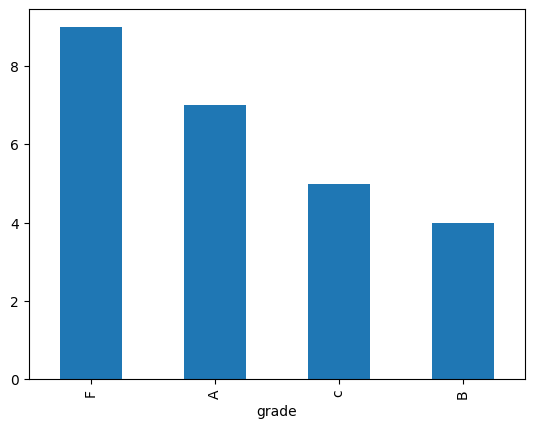

In [ ]:
#Bar chart of grades
df['grade'].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

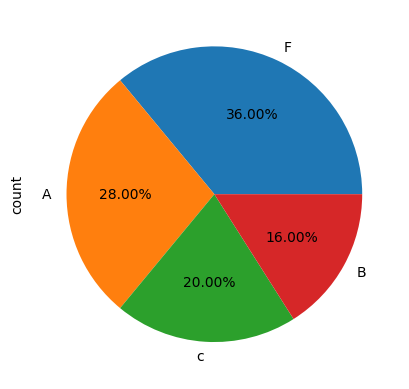

In [ ]:
#Pie chart with percentage values
df['grade'].value_counts().plot(kind="pie",autopct='%0.2f%%')

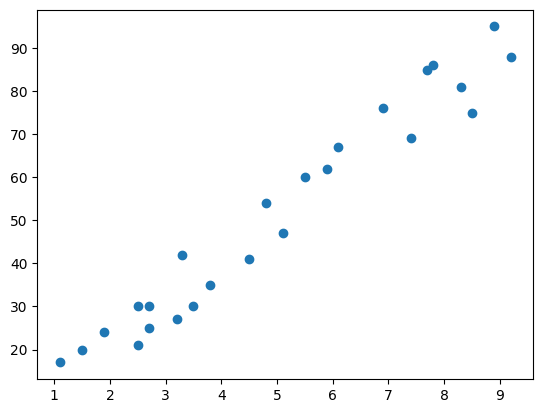

In [ ]:
#Scatter plot
#Shows relationship between study hours & scores
plt.scatter(df['Hours'],df['Scores'])

In [ ]:
#Shows correlation coefficient
#Value close to 1 → strong positive relationship
df.corr(numeric_only=True)


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


###Feature & target selection


In [ ]:
x=df.iloc[:, : -2]# features
x


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [ ]:
y=df.iloc[:, -2] #Target
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [ ]:
#Imports splitting model
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#Imports regression model
from sklearn.linear_model import LinearRegression
#Creates model object
linreg=LinearRegression()

In [ ]:
#To train data use .fit()
#Learns slope (m) and intercept (c)
linreg.fit(xtrain,ytrain)
#Predicts scores for test data
linreg.predict(xtest)

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [ ]:
#Stores predictions
yp = linreg.predict(xtest)
yp

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [ ]:
#To find m use .coef_
#Gives slope (m)
linreg.coef_

array([10.46110829])

In [ ]:
# To find Intercept use .intercept_
# Gives intercept (c)
linreg.intercept_

NameError: name 'linreg' is not defined

In [ ]:
#Training data + regression line
plt.scatter(xtrain,ytrain,color="red")
plt.plot(xtrain,linreg.predict(xtrain))

#Its give you to y predictions for training sets

NameError: name 'xtrain' is not defined

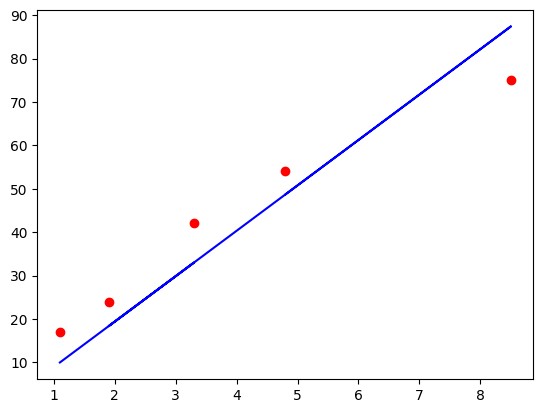

In [ ]:
#Testing data + regression line
plt.scatter(xtest,ytest,color="red")
plt.plot(xtest,linreg.predict(xtest),color="blue")



###MODEL EVALUATION

In [ ]:
#Imports evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,yp)    #MEAN ABSOLUTE ERROR
mse=mean_squared_error(ytest,yp)     #MEAN SQUARED ERROR
r2 = r2_score(ytest,yp)  #Model accuracy (0 to 1)
rmse = np.sqrt(mse)      # root_mean_squared_error


print(f"MAE: {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy:{r2}")

MAE: 7.882398086270432
MSE : 68.88092074277635
RMSE : 8.299453038771674
Accuracy:0.8421031525243527


####Predicting new value

In [ ]:
#Takes user input
new_obs = float(input('Enter a hour:'))
#Predicts score for given study hours
py=linreg.predict([[new_obs]])[0]
print(f"if you study of {new_obs} hrs, you will score around{py: 2f} marks")

Enter a hour:3
if you study of 3.0 hrs, you will score around 29.846368 marks


In [ ]:
print(py)

29.846367549178446


In [ ]:
#Defines reusable function
def mark_predict(new_obs):
  py=linreg.predict([[new_obs]])[0]
  print(f"if you study of {new_obs} hrs, you will score around{py: 2f} marks")
  mark_predict(5.4)

In [ ]:
mark_predict(5.4)

NameError: name 'mark_predict' is not defined